# Task 6.4 Machine Learning


## This script contains the following:

#### 1. Importing libraries and data
#### 2. Data cleaning
#### 3. Data prep for regression analysis
#### 4. Regression analysis

In [64]:
# Import libraries 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import pyplot
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [45]:
%matplotlib inline

In [46]:
#Import data frame

df = pd.read_csv(r"C:\Users\thoms\Desktop\Data Analytics\Achievement 6\Rental Car\02. Data\Prepared Data\CarRentalDataV1.csv")

In [47]:
path = r'Users\thoms\Desktop\Data Analytics\Achievement 6\Rental Car\02. Data'

In [48]:
# Data Cleaning

df.columns

Index(['Unnamed: 0', 'fuel.type', 'rating', 'renter.trips.taken',
       'review.count', 'location.city', 'location.country',
       'location.latitude', 'location.longitude', 'location.state', 'owner.id',
       'rate.daily', 'vehicle.make', 'vehicle.model', 'vehicle.type',
       'vehicle.year', 'airport.city', 'rate category'],
      dtype='object')

In [49]:
df.head()

,Unnamed: 0,fuel.type,rating,renter.trips.taken,review.count,location.city,location.country,location.latitude,location.longitude,location.state,owner.id,rate.daily,vehicle.make,vehicle.model,vehicle.type,vehicle.year,airport.city,rate category
0,0,ELECTRIC,5.00,13.0,12.0,Seattle,US,47.449107,-122.308841,WA,12847615,135,Tesla,Model X,suv,2019,Albuquerque,High rate
1,1,ELECTRIC,5.00,2.0,1.0,Tijeras,US,35.111060,-106.276551,NM,15621242,190,Tesla,Model X,suv,2018,Albuquerque,High rate
2,2,HYBRID,4.92,28.0,24.0,Albuquerque,US,35.127163,-106.566681,NM,10199256,35,Toyota,Prius,car,2012,Albuquerque,High rate
3,3,GASOLINE,5.00,21.0,20.0,Albuquerque,US,35.149726,-106.711425,NM,9365496,75,Ford,Mustang,car,2018,Albuquerque,average rate
4,4,GASOLINE,5.00,3.0,1.0,Albuquerque,US,35.208659,-106.601008,NM,3553565,47,Chrysler,Sebring,car,2010,Albuquerque,average rate


In [50]:
df.shape

(5776, 18)

In [51]:
del df['Unnamed: 0']


In [52]:
df.describe()

,rating,renter.trips.taken,review.count,location.latitude,location.longitude,owner.id,rate.daily,vehicle.year
count,5776.000000,5776.000000,5776.000000,5776.000000,5776.000000,5.776000e+03,5776.000000,5776.000000
mean,4.920462,36.076864,31.013305,35.619656,-99.700961,6.042702e+06,92.950312,2015.324100
std,0.174438,40.913303,34.129631,6.425252,20.412581,4.643376e+06,92.335654,3.959083
min,1.000000,1.000000,1.000000,21.272565,-158.165693,5.105000e+03,20.000000,1955.000000
25%,4.910000,9.000000,8.000000,30.494413,-117.159396,1.951101e+06,45.000000,2013.000000
50%,4.980000,25.000000,22.000000,35.615110,-95.766487,4.993965e+06,69.000000,2016.000000
75%,5.000000,46.000000,40.000000,40.000311,-81.556676,9.658961e+06,110.000000,2018.000000
max,5.000000,395.000000,321.000000,64.893610,-68.823637,1.581088e+07,1500.000000,2020.000000


In [53]:
df.isnull().sum()

fuel.type               0
rating                  0
renter.trips.taken      0
review.count            0
location.city           0
location.country        0
location.latitude       0
location.longitude      0
location.state          0
owner.id                0
rate.daily              0
vehicle.make            0
vehicle.model           0
vehicle.type            0
vehicle.year            0
airport.city            0
rate category         369
dtype: int64

In [54]:
# Check duplicates


dups = df.duplicated()

In [55]:
dups.shape 

(5776,)

In [57]:
# check count of fuel type

df["fuel.type"].value_counts()


GASOLINE    4810
ELECTRIC     622
HYBRID       274
DIESEL        70
Name: fuel.type, dtype: int64

In [62]:
# get number of categories values 

print("Number of Categories in: ")
for ColName in df[['fuel.type','location.city','location.state','vehicle.make','vehicle.model','vehicle.year']]:
    print("{} = {}".format(ColName,len(df[ColName].unique())))

Number of Categories in: 
fuel.type = 4
location.city = 968
location.state = 46
vehicle.make = 54
vehicle.model = 523
vehicle.year = 33


C:\Users\thoms\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='rate.daily', ylabel='Density'>

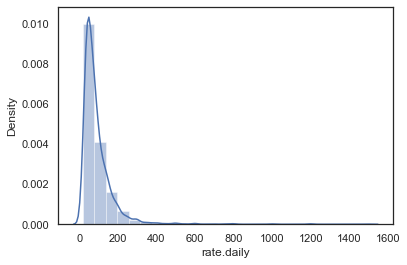

In [69]:
# Extreme values checks


sns.distplot(df['rate.daily'], bins=25)

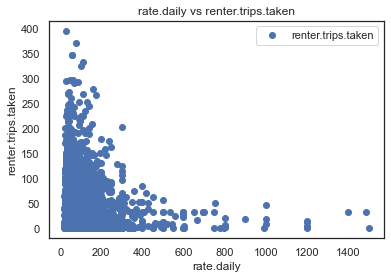

In [70]:
# Data prep for Regession Analysis
# create scatterplot loan_amount vs person_income

df.plot(x='rate.daily', y='renter.trips.taken', style='o')
plt.title('rate.daily vs renter.trips.taken')
plt.xlabel('rate.daily')
plt.ylabel('renter.trips.taken')
plt.show()

In [71]:
# reshape the variables

x = df['rate.daily'].values.reshape(-1,1)
y = df['renter.trips.taken'].values.reshape(-1,1)

In [72]:
x

array([[135],
       [190],
       [ 35],
       ...,
       [ 35],
       [ 77],
       [ 35]], dtype=int64)

In [73]:
y

array([[13.],
       [ 2.],
       [28.],
       ...,
       [18.],
       [ 1.],
       [16.]])

## Hypothesis

## The more a cusomter rents vehicles then the lower the price will be. 

In [74]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [75]:
## Regression analysis

regression = LinearRegression()

In [76]:
regression.fit(x_train, y_train)

LinearRegression()

In [77]:
y_predicted = regression.predict(x_test)

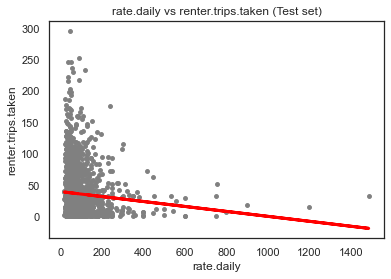

In [78]:
# loan_amount vs person_income

plot_test = plt
plot_test.scatter(x_test, y_test, color='gray', s = 15)
plot_test.plot(x_test, y_predicted, color='red', linewidth =3)
plot_test.title('rate.daily vs renter.trips.taken (Test set)')
plot_test.xlabel('rate.daily')
plot_test.ylabel('renter.trips.taken')
plot_test.show()

In [79]:
rmse = mean_squared_error(y_test, y_predicted) 
r2 = r2_score(y_test, y_predicted)

In [80]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.03946143]]
Mean squared error:  1474.16120300757
R2 score:  0.007690784278118867


In [81]:
# Interpretation of rate.daily vs renter.trips.taken

# comparison of actual and predicted

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,60.000000,34.730482
1,33.477354,34.217483
2,14.000000,37.374398
3,44.000000,37.926858
4,1.000000,35.914325
5,31.000000,28.140422
6,33.477354,31.968181
7,2.000000,39.071239
8,16.000000,38.439856
9,5.000000,38.676625


In [82]:
# Comparing against training set

y_predicted = regression.predict(x_train)

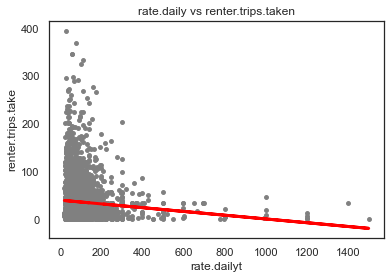

In [83]:
plot_train = plt
plot_train.scatter(x_train, y_train, color='gray', s = 15)
plot_train.plot(x_train, y_predicted, color='red', linewidth =3)
plot_train.title('rate.daily vs renter.trips.taken')
plot_train.xlabel('rate.dailyt')
plot_train.ylabel('renter.trips.take')
plot_train.show()

In [84]:
rmse = mean_squared_error(y_train, y_predicted) 
r2 = r2_score(y_train, y_predicted)

In [85]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.03946143]]
Mean squared error:  1740.5823052771962
R2 score:  0.0077459783618768485
